In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [2]:
os.chdir('F:/Python/Projects/exer')

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_orders = pd.read_csv('data_orders.csv')

In [4]:
print(df_orders.info())
print(df_orders.isna().sum())
df_orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB
None
order_datetime                      0
origin_longitude                    0
origin_latitude                     0
m_order_eta                      7902
order_gk                            0
order_status_key                 

order_datetime  origin_longitude  origin_latitude  m_order_eta  \
0           18:08:07            -0.979           51.456       60.000   
1           20:57:32            -0.950           51.457          NaN   
2           12:07:50            -0.970           51.456      477.000   
3           13:50:20            -1.055           51.461      658.000   
4           21:24:45            -0.968           51.458          NaN   
...              ...               ...              ...          ...   
10711       13:11:35            -0.975           51.458          NaN   
10712       13:13:55            -0.975           51.458          NaN   
10713       13:17:21            -0.973           51.458       60.000   
10714       13:16:28            -0.975           51.458          NaN   
10715       11:49:35            -0.975           51.458      177.000   

            order_gk  order_status_key  is_driver_assigned_key  \
0      3000583041974                 4                       1   
1      3000583116437                 4                       0   
2      3000582891479                 4                       1   
3      3000582941169                 4                       1   
4      3000583140877                 9                       0   
...              ...               ...                     ...   
10711  3000599186906                 4                       0   
10712  3000599186962                 4                       0   
10713  3000599187034                 4                       1   
10714  3000599187024                 4                       0   
10715  3000592871241                 4                       1   

       cancellations_time_in_seconds  
0                            198.000  
1                            128.000  
2                             46.000  
3                             62.000  
4                                NaN  
...                              ...  
10711                         36.000  
10712                          4.000  
10713                         34.000  
10714                          6.000  
10715                         40.000  

[10716 rows x 8 columns]

In [5]:
df_orders = df_orders.sort_values(by='order_datetime')
df_orders.reset_index(inplace=True, drop=True)
df_orders['hour'] = df_orders.apply(lambda x: x['order_datetime'][:2], axis=1)
df_orders['minute'] = df_orders.apply(lambda x: x['order_datetime'][3:5], axis=1)
df_orders['second'] = df_orders.apply(lambda x: x['order_datetime'][6:], axis=1)

In [6]:
df_orders.describe()

origin_longitude  origin_latitude  m_order_eta          order_gk  \
count         10716.000        10716.000     2814.000         10716.000   
mean             -0.964           51.451      441.415 3000598216166.141   
std               0.023            0.012      288.006      23962605.027   
min              -1.067           51.399       60.000 3000550131545.000   
25%              -0.974           51.445      233.000 3000583470351.750   
50%              -0.966           51.452      368.500 3000594997547.000   
75%              -0.950           51.457      653.000 3000623468170.750   
max              -0.867           51.496     1559.000 3000632546049.000   

       order_status_key  is_driver_assigned_key  cancellations_time_in_seconds  
count         10716.000               10716.000                       7307.000  
mean              5.591                   0.263                        157.892  
std               2.329                   0.440                        213.367  
min               4.000                   0.000                          3.000  
25%               4.000                   0.000                         45.000  
50%               4.000                   0.000                         98.000  
75%               9.000                   1.000                        187.500  
max               9.000                   1.000                       4303.000

In [7]:
cance_by_sys = df_orders[df_orders['order_status_key'] == 9]
cance_by_user = df_orders[df_orders['order_status_key'] == 4]

In [8]:
print(cance_by_sys['is_driver_assigned_key'].value_counts())
print(cance_by_user['is_driver_assigned_key'].value_counts())

0    3406
1       3
Name: is_driver_assigned_key, dtype: int64
0    4496
1    2811
Name: is_driver_assigned_key, dtype: int64


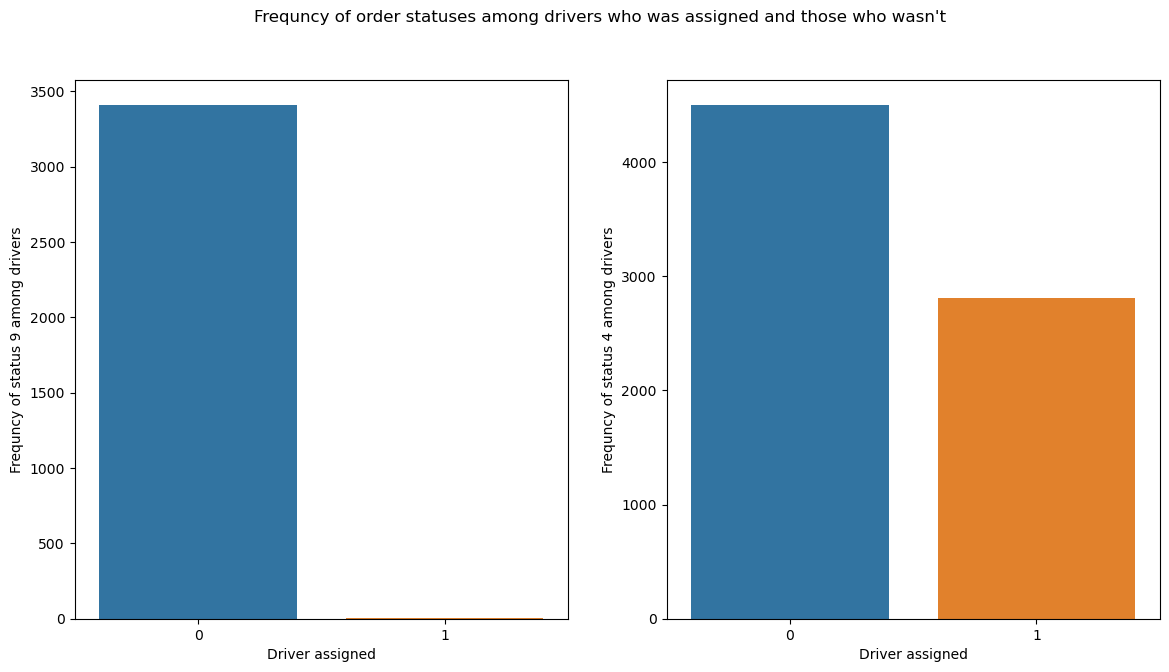

In [9]:
plt.figure(figsize=(14 , 7))
plt.subplot(1, 2, 1)
sns.barplot(data=cance_by_sys, x=cance_by_sys['is_driver_assigned_key'].value_counts().keys(), y=cance_by_sys['is_driver_assigned_key'].value_counts().values)
plt.xlabel('Driver assigned')
plt.ylabel('Frequncy of status 9 among drivers')
plt.subplot(1, 2, 2)
sns.barplot(data=cance_by_sys, x=cance_by_user['is_driver_assigned_key'].value_counts().keys(), y=cance_by_user['is_driver_assigned_key'].value_counts().values)
plt.xlabel('Driver assigned')
plt.ylabel('Frequncy of status 4 among drivers')
plt.suptitle("Frequncy of order statuses among drivers who was assigned and those who wasn't")
plt.show()
# There is very small number of assignments on first plot. This is because of the order status. There was some errors while
# orderings, not enough drivers etc.
# On the right plot situation is more interesting. We can see that most part of order was calcelled before driver assignment. 
# There can be many reasons why this happened, some of them: person just accidently ordered the car; people's plans has changed;
# the systed searched for driver too long etc. 
# But what is more interesting is that the number of cancellations even after driver's assignment is pretty high.
# The number of such cancellations is less than others only by 37.4%. In fact the reasons most of the reasons can be the same, 
# but there can be additional one. People ordered taxi and after driver was found they saw that he's pretty far and 
# they need to wait for him pretty long time so they cancelled the ride in order to find someone who is closer.

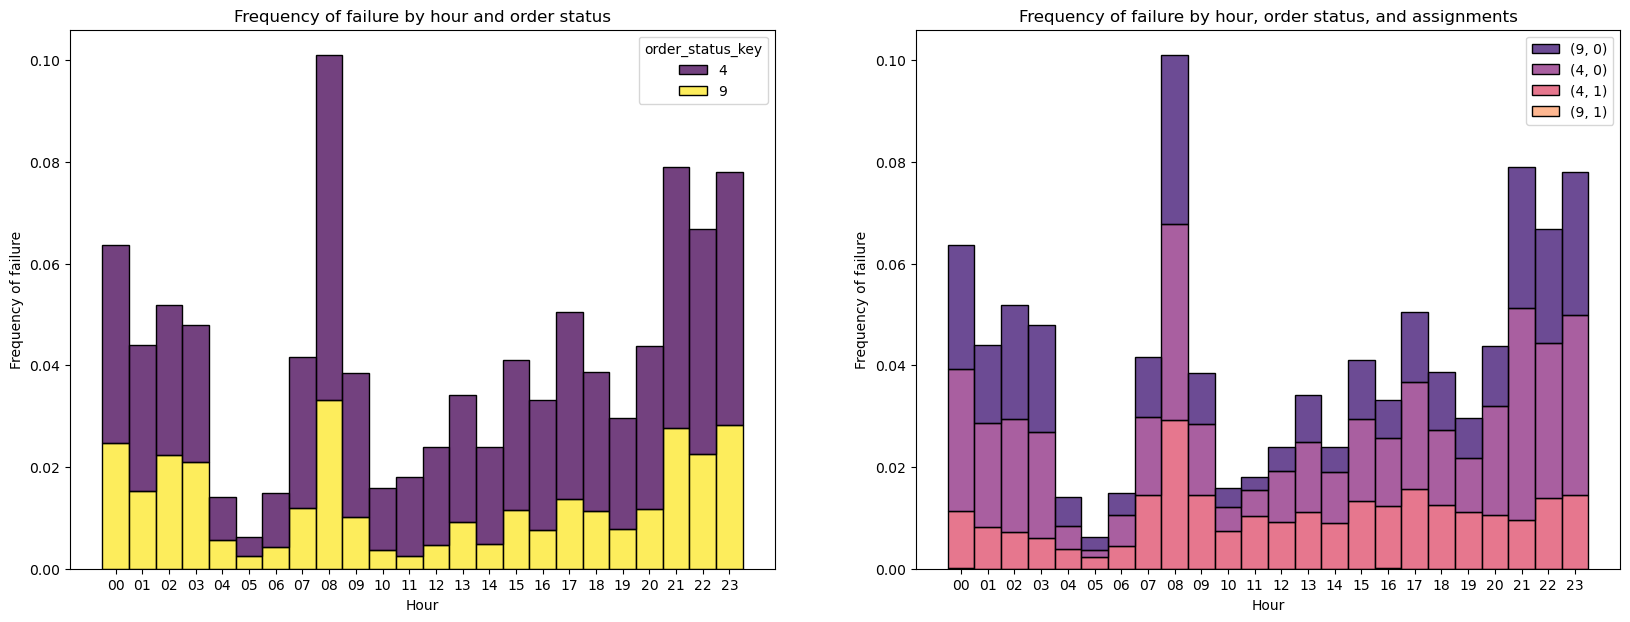

In [10]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=df_orders, 
             x='hour', 
             hue='order_status_key', 
             multiple='stack', 
             palette='viridis', 
             stat='probability')
plt.xlabel('Hour')
plt.ylabel('Frequency of failure')
plt.title('Frequency of failure by hour and order status')

plt.subplot(1, 2, 2)
sns.histplot(data=df_orders, 
             x='hour', 
             hue=df_orders[['order_status_key', 'is_driver_assigned_key']].apply(tuple, axis=1), 
             multiple='stack', 
             palette='magma', 
             stat='probability')
plt.xlabel('Hour')
plt.ylabel('Frequency of failure')
plt.title('Frequency of failure by hour, order status, and assignments')

plt.show()
# There is interesting situation happening on this histograms. We clearly can see that at 8th hour there is a pick of failures.
# The 2nd place, according to number of failures, takes 21st hour. It's expectedly that the most part of failures was in morning.
# Most people go to work and some of them need taxi. And some of them cancel their rides. As for 21st, 22nd and 23rd hours,
# it's possibly that some people attend some events, some people could go somewhere after work and delay there, someone could
# just finish their workday, or maybe there was some holiday this day.
# On the y-axis of histograms we can see percentages of 4th and 9th statuses. We can notice that most of the failures 
# was because of users that cancelled their order. Also, It was pretty expectedly that in the peak hours there were 
# a lot of system rejections. There can be different reasons: system overload because of much orderings; the lack of drivers 
# that can accept order; bugs in the app etc. 
# Looking on the right we can notice more details. For example, we clearly can see that the most cancels by users 
# happened before driver was assigned. This could happen because of several of the reasons I mentioned earlier: 
# The app could't find driver for a long time; people changed their plans etc.
# We can notice pretty big amount of cancels even after assignment. Reasons of that I mentioned earlier as well. One of them,
# that is the most probable, is that driver was pretty was from the user so it would take a long time to wait for him.

In [11]:
print(df_orders.isna().sum())
print('=====================================================')
print(cance_by_sys.isna().sum())
print('=====================================================')
print(cance_by_user.isna().sum())
# We can see that NA values in "cancellations_time_in_seconds" column are those from DF wher order was failed because of the system.
# It happened immediately so there is no data related to number of seconds before cancelling the ride

order_datetime                      0
origin_longitude                    0
origin_latitude                     0
m_order_eta                      7902
order_gk                            0
order_status_key                    0
is_driver_assigned_key              0
cancellations_time_in_seconds    3409
hour                                0
minute                              0
second                              0
dtype: int64
order_datetime                      0
origin_longitude                    0
origin_latitude                     0
m_order_eta                      3406
order_gk                            0
order_status_key                    0
is_driver_assigned_key              0
cancellations_time_in_seconds    3409
hour                                0
minute                              0
second                              0
dtype: int64
order_datetime                      0
origin_longitude                    0
origin_latitude                     0
m_order_eta             

In [12]:
cance_by_user['cancellations_time_in_seconds'].describe()

count   7307.000
mean     157.892
std      213.367
min        3.000
25%       45.000
50%       98.000
75%      187.500
max     4303.000
Name: cancellations_time_in_seconds, dtype: float64

In [13]:
def outliers_detector(method, data=cance_by_user['cancellations_time_in_seconds'], num=None, eliminate=False):
    if method == 'IQR':
        counter = 0
        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        IQR = q3 - q1
        lowest = q1 - 1.5*IQR
        highest = q3 + 1.5*IQR
        if num:
            if eliminate: 
                if num > highest or num < lowest:
                    return data.mean()
                else:
                    return num
            else:
                if num > highest or num < lowest:
                    return 'Outlier'
                else:
                    return 'OK'
        else:
            for val in data:
                if val > highest or val < lowest:
                    counter += 1
            return f'Outliers found(IQR): {counter}'
    
    if method == 'z_score':
        if num:
            z_score = np.abs((num - data.mean()) / data.std())
            if eliminate: 
                if z_score > 3:
                    return data.mean()
                else:
                    return num
            else:
                if num > z_score:
                    return 'Outlier'
                else:
                    return 'OK'
        else:
            counter = 0
            for val in data:
                z_score = np.abs((val - data.mean()) / data.std())
                if z_score > 3:
                    counter += 1
            return f'Outliers found(z-score): {counter}'

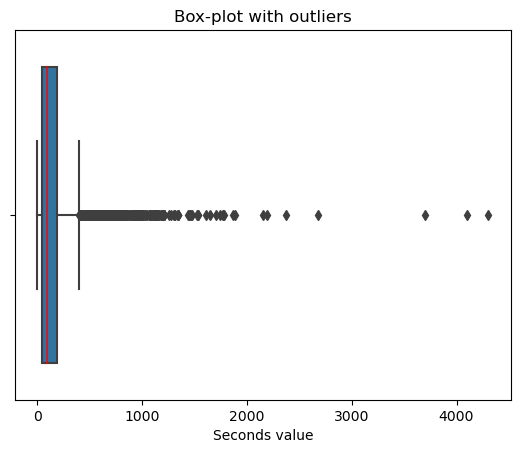

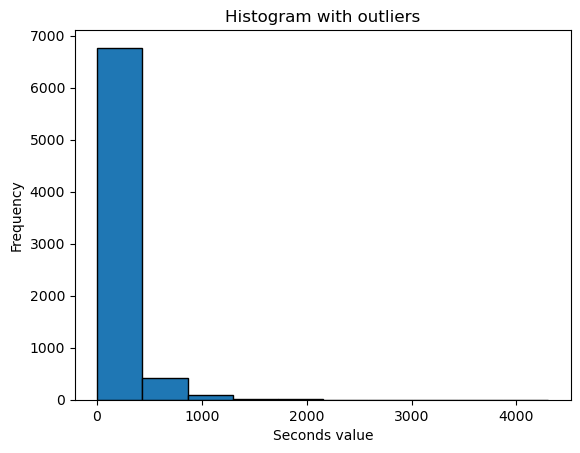

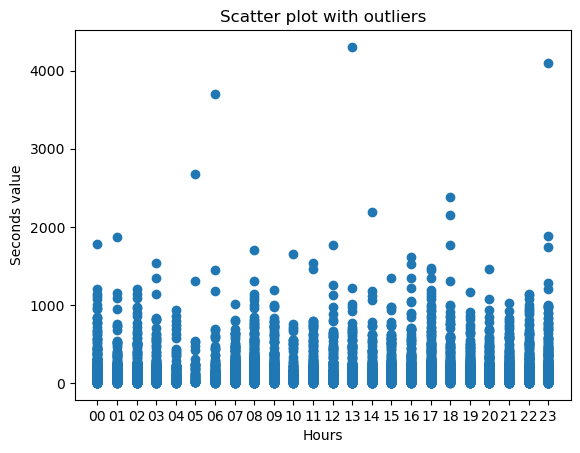

Outliers found(IQR): 592
Outliers found(z-score): 144


In [14]:
sns.boxplot(data=cance_by_user, x='cancellations_time_in_seconds', medianprops=dict(color="red", alpha=0.7))
plt.xlabel('Seconds value')
plt.title('Box-plot with outliers')
plt.show()
plt.hist(cance_by_user['cancellations_time_in_seconds'], edgecolor='black')
plt.xlabel('Seconds value')
plt.ylabel('Frequency')
plt.title('Histogram with outliers')
plt.show()
plt.scatter(cance_by_user['hour'], cance_by_user['cancellations_time_in_seconds'])
plt.xlabel('Hours')
plt.ylabel('Seconds value')
plt.title('Scatter plot with outliers')
plt.show()
print(outliers_detector('IQR'))
print(outliers_detector('z_score'))
# There is some outliers. I want to remove because it is clear that there is anomalies. First of all, there can't be
# situation when taxi will drive to you for 3000-4000 seconds(50-60 minutes). We can assume that there can be such strange 
# situation, but no one will wait 50-60 minutes for taxi.


In [15]:
cance_by_user['cancellations_time_in_seconds'] = cance_by_user.apply(lambda x: outliers_detector('IQR', num=x['cancellations_time_in_seconds'], eliminate=True), axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4468\1383729410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cance_by_user['cancellations_time_in_seconds'] = cance_by_user.apply(lambda x: outliers_detector('IQR', num=x['cancellations_time_in_seconds'], eliminate=True), axis=1)


In [16]:
cance_by_user['cancellations_time_in_seconds'].describe()

count   7307.000
mean     113.023
std       82.409
min        3.000
25%       45.000
50%       98.000
75%      157.892
max      401.000
Name: cancellations_time_in_seconds, dtype: float64

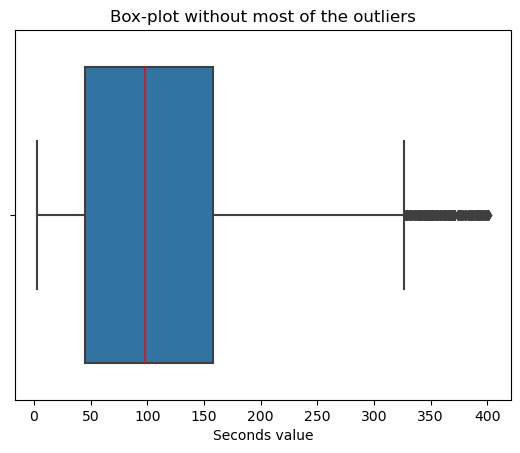

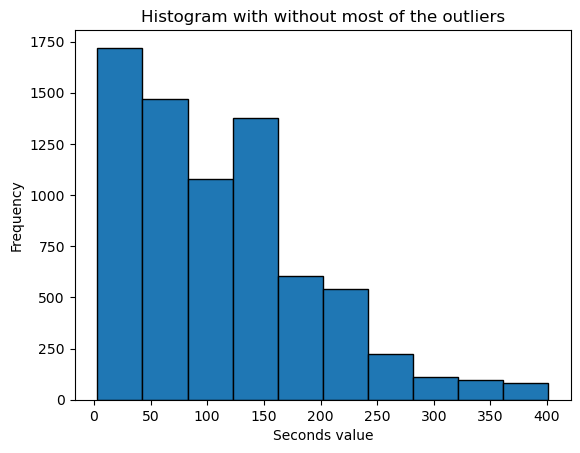

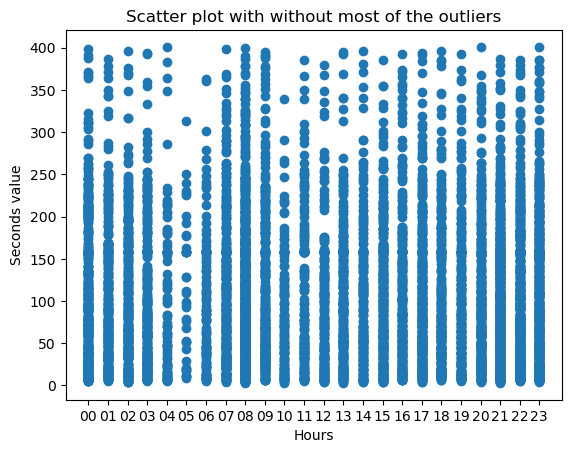

In [17]:
sns.boxplot(data=cance_by_user, x='cancellations_time_in_seconds', medianprops=dict(color="red", alpha=0.7))
plt.xlabel('Seconds value')
plt.title('Box-plot without most of the outliers')
plt.show()
plt.hist(cance_by_user['cancellations_time_in_seconds'], edgecolor='black')
plt.xlabel('Seconds value')
plt.ylabel('Frequency')
plt.title('Histogram with without most of the outliers')
plt.show()
plt.scatter(cance_by_user['hour'], cance_by_user['cancellations_time_in_seconds'])
plt.xlabel('Hours')
plt.ylabel('Seconds value')
plt.title('Scatter plot with without most of the outliers')
plt.show()
# This data looks better, there is still some outliers but they are acceptable

In [18]:
means_by_hours = pd.DataFrame(cance_by_user.groupby('hour')['cancellations_time_in_seconds'].agg('mean')).reset_index()
data_before_as = cance_by_user[cance_by_user['is_driver_assigned_key'] == 0]
data_after_as = cance_by_user[cance_by_user['is_driver_assigned_key'] == 1]
means_before = pd.DataFrame(data_before_as.groupby('hour')['cancellations_time_in_seconds'].agg('mean')).reset_index()
means_after = pd.DataFrame(data_after_as.groupby('hour')['cancellations_time_in_seconds'].agg('mean')).reset_index()

In [19]:
print(data_before_as.info())
print("==============================================================================")
print(data_after_as.info())
# Here we can notice that data about time before order arrival is avalilable only after driver was found(expectedly) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4496 entries, 1 to 10714
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 4496 non-null   object 
 1   origin_longitude               4496 non-null   float64
 2   origin_latitude                4496 non-null   float64
 3   m_order_eta                    0 non-null      float64
 4   order_gk                       4496 non-null   int64  
 5   order_status_key               4496 non-null   int64  
 6   is_driver_assigned_key         4496 non-null   int64  
 7   cancellations_time_in_seconds  4496 non-null   float64
 8   hour                           4496 non-null   object 
 9   minute                         4496 non-null   object 
 10  second                         4496 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 421.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64

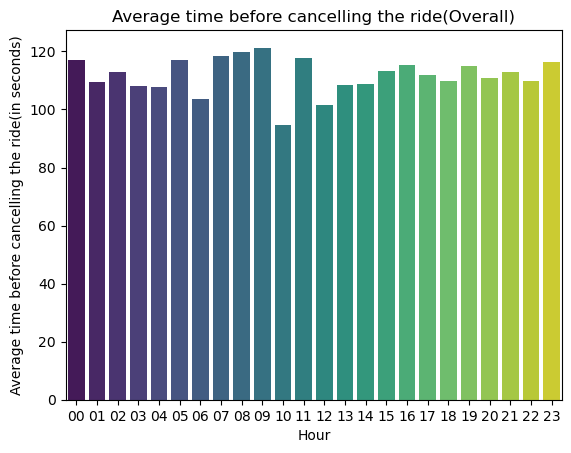

In [20]:
sns.barplot(means_by_hours, x='hour', y='cancellations_time_in_seconds', palette='viridis')
plt.xlabel('Hour')
plt.ylabel('Average time before cancelling the ride(in seconds)')
plt.title('Average time before cancelling the ride(Overall)')
plt.show()
# We can see that mostly average time before cancelling doesn't exceed 120 seconds. The only exeption is 9th hour, there is 121
# seconds, but it's not significant.

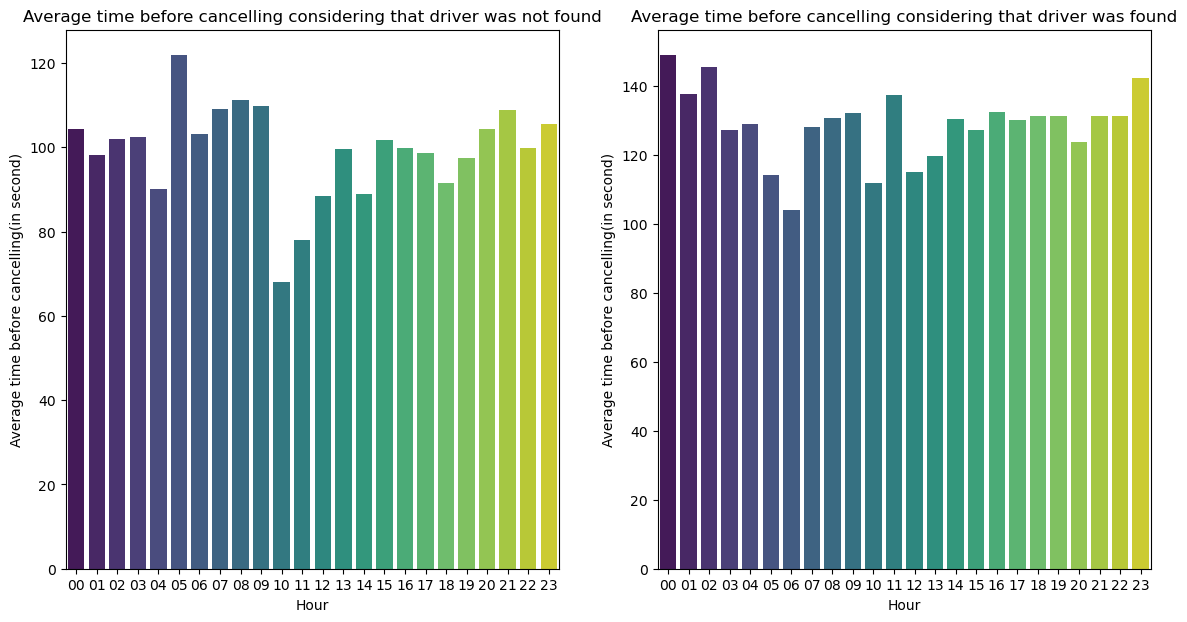

In [21]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(means_before, x='hour', y='cancellations_time_in_seconds', palette='viridis')
plt.xlabel('Hour')
plt.ylabel('Average time before cancelling(in second)')
plt.title('Average time before cancelling considering that driver was not found')
plt.subplot(1, 2, 2)
sns.barplot(means_after, x='hour', y='cancellations_time_in_seconds', palette='viridis')
plt.xlabel('Hour')
plt.ylabel('Average time before cancelling(in second)')
plt.title('Average time before cancelling considering that driver was found')
plt.show()
# On the left-hand side we can see distribution of cancellings before before driver was found. We can notice that people that
# ordering taxi at 5th hour are tend to wait more before cancelling. The most probable reason is that there is no much choise.
# There is much less cars available than at midday for example. 
# On the all plots before we could notice that numbers of 10th hour are always the lowest. It could happen because most people
# are working at that time, so there is no much data avilable.
# At the right-hand side we can see that people at midnight are tend to wait more than others after the driver was found.
# It can be related to the time they needed to wait. So maybe they cancelled the ride because there appeared driver that was
# closer.

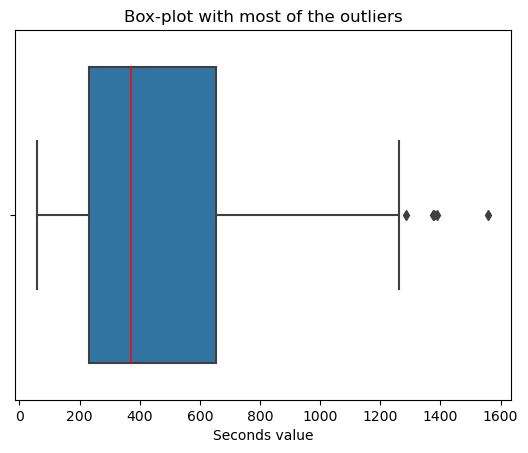

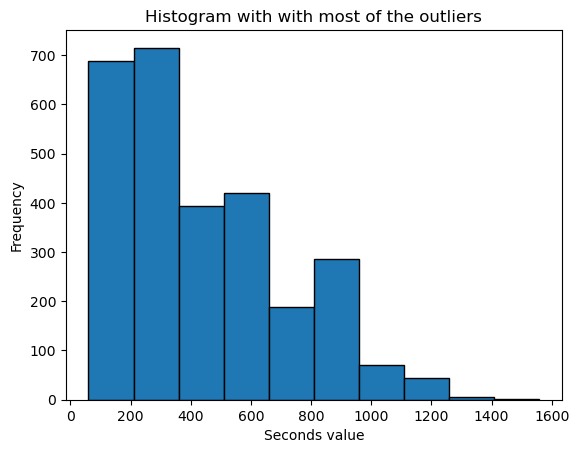

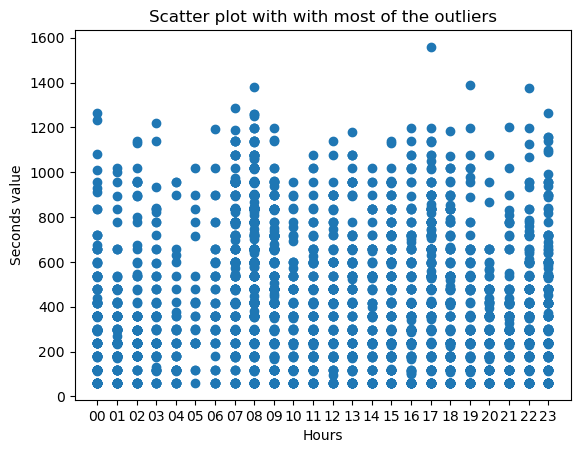

Outliers found(IQR): 5
None


In [22]:
sns.boxplot(data=data_after_as, x='m_order_eta', medianprops=dict(color="red", alpha=0.7))
plt.xlabel('Seconds value')
plt.title('Box-plot with most of the outliers')
plt.show()
plt.hist(data_after_as['m_order_eta'], edgecolor='black')
plt.xlabel('Seconds value')
plt.ylabel('Frequency')
plt.title('Histogram with with most of the outliers')
plt.show()
plt.scatter(data_after_as['hour'], data_after_as['m_order_eta'])
plt.xlabel('Hours')
plt.ylabel('Seconds value')
plt.title('Scatter plot with with most of the outliers')
plt.show()
print(outliers_detector('IQR', data=data_after_as['m_order_eta']))
print(outliers_detector('z-score', data=data_after_as['m_order_eta']))
# We can see that there is not much outliers so I won't eliminate them

In [23]:
av_time_before_arr = pd.DataFrame(data_after_as.groupby('hour')['m_order_eta'].agg('mean')).reset_index()

In [24]:
av_time_before_arr

hour  m_order_eta
0    00      360.942
1    01      324.750
2    02      391.013
3    03      388.094
4    04      299.659
5    05      411.120
6    06      427.149
7    07      583.359
8    08      636.911
9    09      504.891
10   10      355.557
11   11      390.955
12   12      440.788
13   13      428.025
14   14      387.835
15   15      454.790
16   16      440.740
17   17      519.743
18   18      419.187
19   19      369.817
20   20      300.096
21   21      333.853
22   22      372.745
23   23      408.429

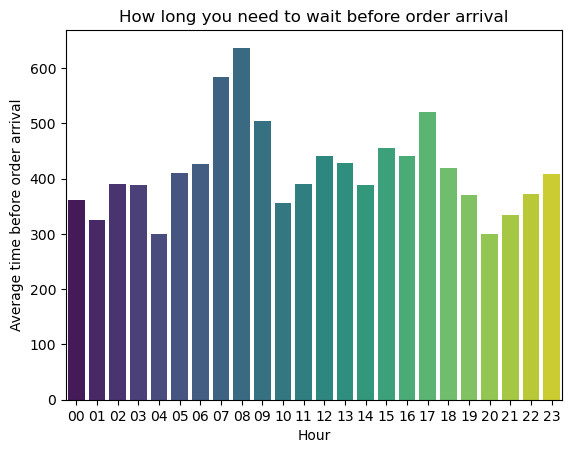

In [25]:
sns.barplot(data=av_time_before_arr, x='hour', y='m_order_eta', palette='viridis')
plt.xlabel('Hour')
plt.ylabel('Average time before order arrival')
plt.title('How long you need to wait before order arrival')
plt.show()
# As we can see at 8th hour, and at morning overall(from 6 to 9) we can see picks. 
# For example, at 8th hour you need to wait more than 600 seconds(10 min) before your order arrival. 
# Again, it's pretty expectadly. Most people go to work so they need taxi. Driver that completed one order can immediately 
# take another being on the other end of the city. Also this is can cause high failure rate, because people just don't have time 
# to wait. 
# Another noticebale pick we can see at 17th hour. The time when a lot of people come back home after workday,
# so a lot of drivers are pretty busy at that time too.

In [26]:
df_orders

order_datetime  origin_longitude  origin_latitude  m_order_eta  \
0           00:00:02            -0.972           51.453          NaN   
1           00:00:03            -0.953           51.452          NaN   
2           00:00:05            -0.972           51.460          NaN   
3           00:00:11            -0.937           51.449          NaN   
4           00:00:16            -0.960           51.414          NaN   
...              ...               ...              ...          ...   
10711       23:59:34            -0.947           51.444          NaN   
10712       23:59:40            -0.962           51.455          NaN   
10713       23:59:42            -0.973           51.459          NaN   
10714       23:59:47            -0.997           51.457          NaN   
10715       23:59:59            -0.972           51.458      293.000   

            order_gk  order_status_key  is_driver_assigned_key  \
0      3000585142206                 9                       0   
1      3000600112135                 4                       0   
2      3000617553045                 4                       0   
3      3000617553053                 4                       0   
4      3000625792879                 4                       0   
...              ...               ...                     ...   
10711  3000625141936                 9                       0   
10712  3000630782037                 4                       0   
10713  3000625792845                 4                       0   
10714  3000595772141                 4                       0   
10715  3000631431496                 4                       1   

       cancellations_time_in_seconds hour minute second  
0                                NaN   00     00     02  
1                            234.000   00     00     03  
2                            120.000   00     00     05  
3                            200.000   00     00     11  
4                            152.000   00     00     16  
...                              ...  ...    ...    ...  
10711                            NaN   23     59     34  
10712                        240.000   23     59     40  
10713                         77.000   23     59     42  
10714                         22.000   23     59     47  
10715                        115.000   23     59     59  

[10716 rows x 11 columns]

In [27]:
import folium as f

In [28]:
lat = df_orders['origin_latitude'].to_numpy()
long = df_orders['origin_longitude'].to_numpy()

In [29]:
m = f.Map(location=[51.453, -0.972], zoom_start=12)
for i, j in zip(lat, long):
    f.Circle(location=[i, j], icon=f.Icon(icon='info', radius=4)).add_to(m)

In [30]:
m

## Insights
* The most part of failures happened at 8th hour
* Number of failures after driver was found is pretty small in comparison with other conditions
* Pretty high number of status 9, so it's better to investigate that further. It's can be overload or there can be some bugs in the app
* The highest failure rates at the morning and evening
* You need to wait much longer for driver at morning
* The most of cancellings took place in the centre of city
